In [80]:
import pandas as pd
df = pd.read_csv("datasets/anime_traits.csv")
df

,Id,Names,Hair_Color,Gender,Actor,Adult,Afro,Agent of the Afterlife,Airhead,Alchemist,...,Widow,Wind Powers,Wings,Witch,Wolf,Writer,Yamato Nadeshiko,Youkai,Yuki-onna,Zombie
0,0,L,Black Hair,Male,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,Kakashi HATAKE,Grey Hair,Male,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,Edward ELRIC,Blonde Hair,Male,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,3,Levi,Black Hair,Male,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,Light YAGAMI,Brown Hair,Male,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,1204,Fujimaki,Black Hair,Male,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1205,1205,Lucy ASHLEY,Blonde Hair,Female,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1206,1206,Riki NENDOU,Multicolored Hair,Male,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1207,1207,Johan LIEBERT,Blonde Hair,Male,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
# y = df["Names"]
# X=df.drop(columns=["Names"])
a=df['Names']
b=df.drop(['Names'],axis=1)
c=pd.get_dummies(b)



In [82]:
c.head()

,Id,Actor,Adult,Afro,Agent of the Afterlife,Airhead,Alchemist,Alien,Amnesia,Analytical,...,Hair_Color_Purple Hair,Hair_Color_Red Hair,Hair_Color_Shapeshifter,Hair_Color_Shared Body,Hair_Color_Turquoise Hair,Hair_Color_White Hair,Hair_Color_Yellow Hair,Gender_Female,Gender_Male,Gender_Nuetral
0,0,0,0,0,0,0,0,0,0,1,...,False,False,False,False,False,False,False,False,True,False
1,1,0,1,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
2,2,0,0,0,0,0,1,0,0,0,...,False,False,False,False,False,False,False,False,True,False
3,3,0,1,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
4,4,0,0,0,0,0,0,0,0,1,...,False,False,False,False,False,False,False,False,True,False


In [83]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(criterion="entropy")

In [84]:
y=a
x=c.drop(['Id'],axis=1)
i=0
ar=[]
for col in x.columns:
     ar.append(col)

In [85]:
clf =clf.fit(x,y)

In [ ]:
clf.predict(x)

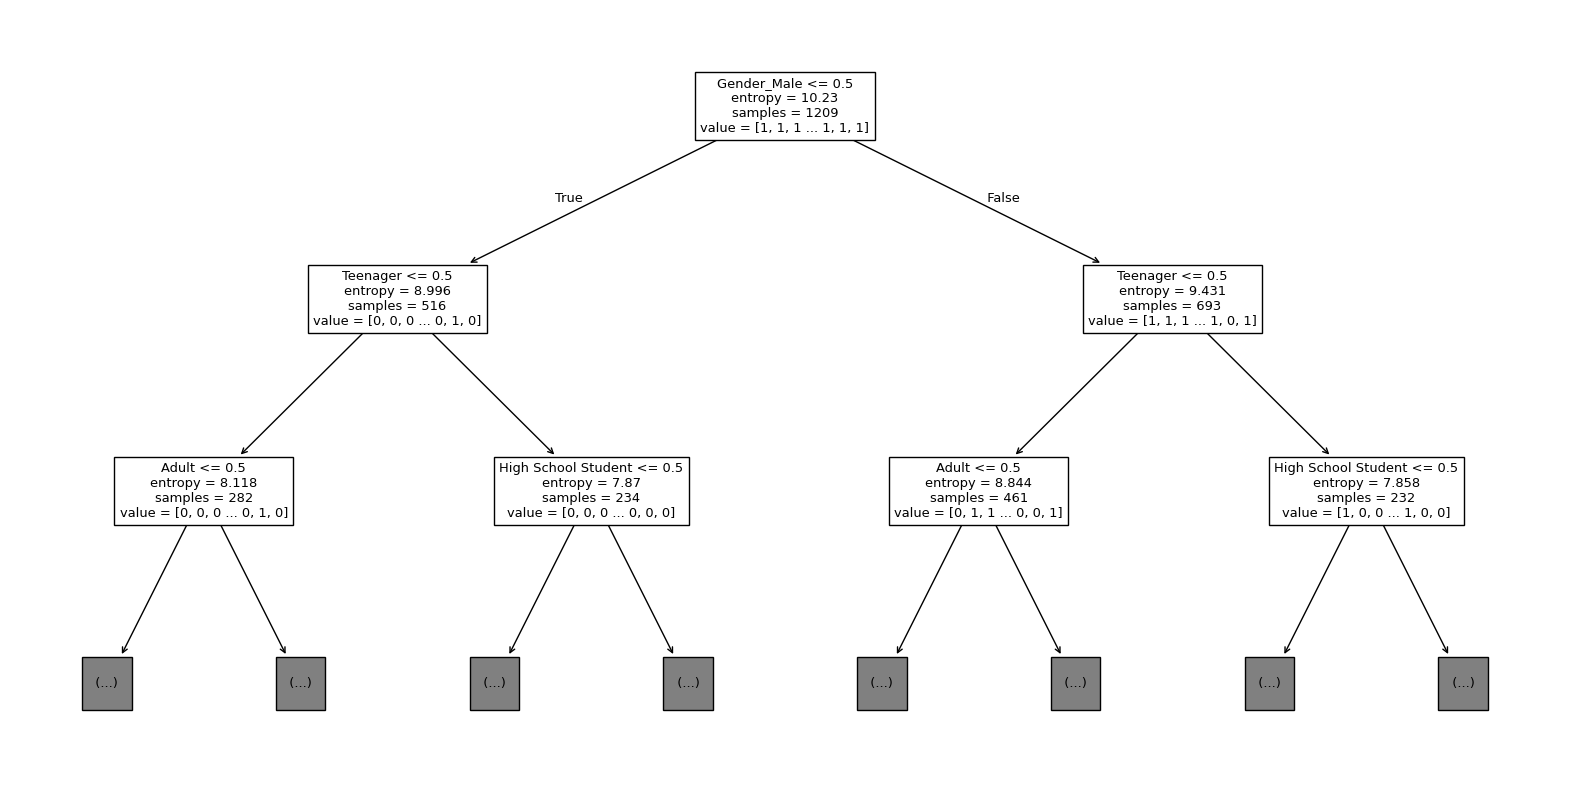

In [97]:
from sklearn import tree
import matplotlib.pyplot as plt

# Example of limiting the depth to 3
fig, ax = plt.subplots(figsize=(20, 10))  # Adjust the size as needed
tree.plot_tree(clf, max_depth=2, feature_names=x.columns, filled=True, ax=ax)
plt.show()


In [87]:
tree_rules = tree.export_text(clf,feature_names=list(x.columns))

In [96]:
def parse_tree_rules(rules_text):
    lines = rules_text.split('\n')
    questions = []
    indent_level = 0
    
    for line in lines:
        # Skip empty lines
        if not line.strip():
            continue

        # Determine the level of indentation
        current_indent = len(line) - len(line.lstrip('|'))

        # Check if this is a new question
        if 'if ' in line:
            # Extract the feature and threshold from the line
            condition = line.split('|')[-1].strip()
            feature, threshold = condition.split(' <= ')
            threshold = threshold.split(' ')[0]  # Remove extra characters if any
            question = f"Is {feature} less than or equal to {threshold}?"
            questions.append((current_indent, question))
        elif 'else' in line:
            # Handle else branches
            continue

    # Sort questions by their level of indentation to preserve tree order
    questions.sort(key=lambda x: x[0])
    return [q[1] for q in questions]

questions = parse_tree_rules(tree_rules)

# Print the questions in order
for i, question in enumerate(questions, 1):
    print(f"Question {i}: {question}")


In [89]:
def convert_rules_to_questions(rules_text):
    lines = rules_text.split('\n')
    questions = []
    
    for line in lines:
        # Example logic to convert rules to questions
        if 'class:' in line:
            continue
        if 'if' in line:
            question = line.replace('if ', '').replace(' <= ', ' is less than or equal to ').replace(' > ', ' is greater than ')
            questions.append(question)
    
    return questions

questions = convert_rules_to_questions(tree_rules)

# Print the questions
for i, question in enumerate(questions, 1):
    print(f"Question {i}: {question}")


Question 1: |   |   |   |   |   |   |   |   |   |   |--- Artificial Intelligence (AI) is less than or equal to 0.50
Question 2: |   |   |   |   |   |   |   |   |   |   |--- Artificial Intelligence (AI) is greater than  0.50
Question 3: |   |   |   |   |   |   |   |--- Agent of the Afterlife is less than or equal to 0.50
Question 4: |   |   |   |   |   |   |   |--- Agent of the Afterlife is greater than  0.50
Question 5: |   |   |   |   |   |   |   |--- Artificial Limb is less than or equal to 0.50
Question 6: |   |   |   |   |   |   |   |--- Artificial Limb is greater than  0.50
Question 7: |   |   |   |   |   |   |   |   |--- Agent of the Afterlife is less than or equal to 0.50
Question 8: |   |   |   |   |   |   |   |   |--- Agent of the Afterlife is greater than  0.50
Question 9: |   |   |   |   |   |   |   |   |   |--- Agent of the Afterlife is less than or equal to 0.50
Question 10: |   |   |   |   |   |   |   |   |   |--- Agent of the Afterlife is greater than  0.50
Question 11: 

In [92]:
clf.predict([x.loc[0]])

C:\Users\PMLS\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['L'], dtype=object)

In [93]:
y

0                    L
1       Kakashi HATAKE
2         Edward ELRIC
3                 Levi
4         Light YAGAMI
             ...      
1204          Fujimaki
1205       Lucy ASHLEY
1206       Riki NENDOU
1207     Johan LIEBERT
1208              Zeno
Name: Names, Length: 1209, dtype: object

In [94]:
x

,Actor,Adult,Afro,Agent of the Afterlife,Airhead,Alchemist,Alien,Amnesia,Analytical,Android,...,Hair_Color_Purple Hair,Hair_Color_Red Hair,Hair_Color_Shapeshifter,Hair_Color_Shared Body,Hair_Color_Turquoise Hair,Hair_Color_White Hair,Hair_Color_Yellow Hair,Gender_Female,Gender_Male,Gender_Nuetral
0,0,0,0,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
1,0,1,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
2,0,0,0,0,0,1,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
3,0,1,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
4,0,0,0,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
1205,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,False
1206,0,0,0,0,1,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
1207,0,1,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
